# Business Understanding

SyriaTel faces challenges with customer churn, where customers stop using their services. The goal of this project is to predict whether a customer is likely to churn based on their usage patterns, contact details and other relevant factors. The primary stakeholders are SyriaTel's management team, marketing department and customer retention team, who are responsible for understanding customer behavior and implementing strategies to retain customers. By identifying at risk customers early, SyriaTel can take proactive measures such as personalized offers, improved customer service or loyalty programs to reduce churn, enhance customer satisfaction and increase revenue.

# Data Understanding

The goal is to explore the astructure and size of the dataset, understand the key features and identify any patterns or anomalies. This includes checking for missing values, non-numeric data and distributions in columns like contract type, customer service calls and monthly charges. This step helps prepare the data for preprocessing and model development.

In [ ]:
!pip install xgboost

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import xgboost as xgb

In [ ]:
df = pd.read_csv('SyriaTel_customer_churn.csv')

In [ ]:
#Printing the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
#Summary of numeric columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Checking for unique values in categorical columns
categorical_columns = ['international plan', 'voice mail plan', 'churn']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())


Unique values in 'international plan':
no     3010
yes     323
Name: international plan, dtype: int64

Unique values in 'voice mail plan':
no     2411
yes     922
Name: voice mail plan, dtype: int64

Unique values in 'churn':
False    2850
True      483
Name: churn, dtype: int64


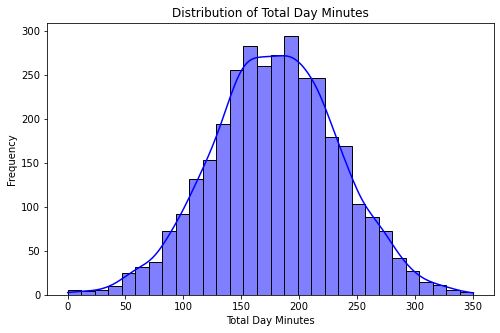

In [ ]:
#Visualize data patterns
#Distribution of total day minutes
plt.figure(figsize=(8, 5))
sns.histplot(df['total day minutes'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Day Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

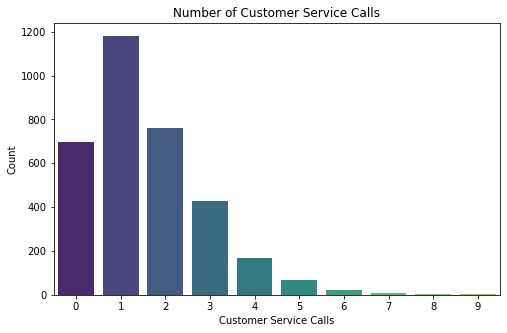

In [ ]:
#Distribution of customer service calls
plt.figure(figsize=(8, 5))
sns.countplot(x='customer service calls', data=df, palette='viridis')
plt.title('Number of Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Count')
plt.show()

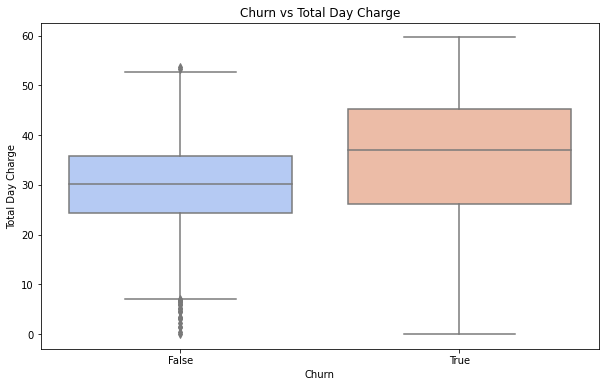

In [ ]:
#Relationship between churn and total charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total day charge', data=df, palette='coolwarm')
plt.title('Churn vs Total Day Charge')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

# Data Preparation
This section focuses on preparing the dataset for machine learning by addressing missing values, encoding categorical features, splitting the data and scaling numerical variables. These steps ensures the dataset is clean, interpretable by machine learning algorithms and optimized for accurate predictions.

#### Convert columns to appropriate types

In [ ]:
df['total day charge'] = pd.to_numeric(df['total day charge'], errors='coerce')
df['total eve charge'] = pd.to_numeric(df['total eve charge'], errors='coerce')

#### Encoding Categorical Varaibles

In [ ]:
#Identify categorical columns
categorical_columns = ['international plan', 'voice mail plan']
print("\nUnique values before encoding: ")
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")


Unique values before encoding: 
international plan: ['no' 'yes']
voice mail plan: ['yes' 'no']


#### Check for duplicates

In [ ]:
df.duplicated().sum()

0

#### Removing outliers

In [ ]:
#Count the number of rows before and after filtering
df_filtered = df[df['churn'] == True]

original_count = df.shape[0]
filtered_count = df_filtered.shape[0]
print(f"Original count: {original_count}, Filtered count: {filtered_count}")

#Checking summary statistics
print("Summary statistics for original Dataframe:")
print(df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].describe())

print("Summary statistics for filtered Dataframe:")
print(df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].describe())

#Checking for outliers in the filtered dataframe
Q1_filtered = df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].quantile(0.25)
Q3_filtered = df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].quantile(0.75)
IQR_filtered = Q3_filtered - Q1_filtered

outliers_filtered = df_filtered[(
    (df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']] < (Q1_filtered - 1.5 * IQR_filtered)) |
    (df_filtered[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']] > (Q3_filtered + 1.5 * IQR_filtered))).any(axis=1)]
print(f"Number of outliers in filtered Dataframe: {outliers_filtered.shape[0]}")

Original count: 3333, Filtered count: 483
Summary statistics for original Dataframe:
       total day minutes  total eve minutes  total night minutes  \
count        3333.000000        3333.000000          3333.000000   
mean          179.775098         200.980348           200.872037   
std            54.467389          50.713844            50.573847   
min             0.000000           0.000000            23.200000   
25%           143.700000         166.600000           167.000000   
50%           179.400000         201.400000           201.200000   
75%           216.400000         235.300000           235.300000   
max           350.800000         363.700000           395.000000   

       total intl minutes  
count         3333.000000  
mean            10.237294  
std              2.791840  
min              0.000000  
25%              8.500000  
50%             10.300000  
75%             12.100000  
max             20.000000  
Summary statistics for filtered Dataframe:
       

#### Split Data into training and testing sets

In [ ]:
#Define the target variable (churn) and features
X = df_filtered.drop(columns=['churn'])
y = df_filtered['churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (338, 20)
Testing set size: (145, 20)


In [ ]:
#Identify numeric columns to scale
numeric_columns = ['account length', 'total day minutes', 'total day calls', 'total day charge',
                   'total eve minutes', 'total eve calls', 'total eve charge',
                   'total night minutes', 'total night calls', 'total night charge',
                   'total intl minutes', 'total intl calls', 'total intl charge',
                   'customer service calls']

#Create copies of the DataFrames to avoid SettingWithCopyWarning
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

scaler = StandardScaler()
X_train_copy.loc[:, numeric_columns] = scaler.fit_transform(X_train_copy[numeric_columns])
X_test_copy.loc[:, numeric_columns] = scaler.transform(X_test_copy[numeric_columns])

#Display the first few rows of the scaled training data
X_train_copy.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
2515,MD,0.204723,510,372-8883,no,no,0,-1.187020,-0.621377,-1.186789,0.023684,-0.845775,0.023300,-0.452892,-0.588461,-0.453158,0.495580,-0.847839,0.494713,1.447616
1310,WA,-1.472454,510,399-3083,no,no,0,-1.821563,0.217048,-1.821740,-0.492401,0.445516,-0.492591,-0.467401,0.549523,-0.466976,-1.188633,0.325024,-1.186501,-0.691375
2629,NH,0.967076,415,402-3370,no,yes,32,1.654880,-0.435060,1.654973,1.368221,0.296521,1.367813,0.057021,0.549523,0.058122,-1.444926,-0.456884,-1.444107,-0.691375
1442,ME,-0.023983,510,390-9627,no,no,0,-0.151787,0.682839,-0.151743,-0.069444,-0.696780,-0.070291,-0.117096,-1.330625,-0.116911,-0.859113,-0.456884,-0.861105,-0.691375
1746,DC,-1.091278,408,355-3801,no,no,0,-0.385641,2.126793,-0.385761,-0.073325,-0.597450,-0.072574,0.859200,-0.093685,0.859587,1.044780,0.715978,1.050599,-0.691375


#### Checking for missing values

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total n

#### Correlation matrix

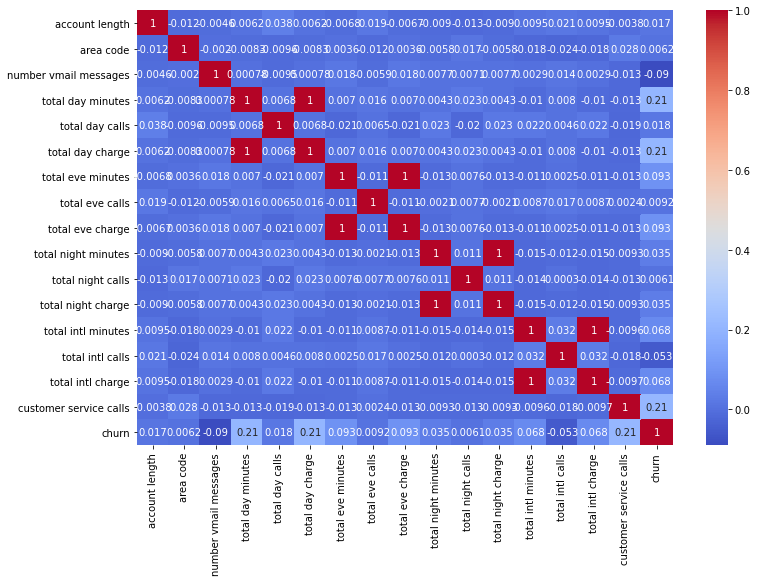

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Handling class imbalance using SMOTE

In [ ]:
print(y_train.value_counts())

0    338
Name: churn, dtype: int64


In [ ]:
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


In [ ]:
#Assuming 'df' is your DataFrame and 'churn' is your target column
X = df.drop('churn', axis=1) #Features
y = df['churn'] #Target

#Remove non-numeric columns e.g 'phone number', 'area code' and 'state'
X_numeric = X.select_dtypes(include=['number'])

#Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

#Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#Initialize a logistic regression model
model = LogisticRegression(max_iter=1000)

#Apply RFE for feature selection
rfe = RFE(model, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train_resampled, y_train_resampled)

#Get the selected features
selected_features = X_resampled.columns[rfe.support_]
print(f"Selected features: {selected_features}")


Selected features: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [ ]:
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
True     2850
False    2850
Name: churn, dtype: int64


# Modeling and Evaluation

This section focuses on building and evaluating machine learning models. We start with a baseline logistic regression model and progress to advance models such as Random Forest and Gradient Boosting. Finally, models are optimized using hyperparameter tuning.

In [ ]:
model_results = {}

## 1. Logistic Regression

state                       int32
account length              int64
area code                   int64
phone number                int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object
Non-numeric columns: Index([], dtype='object')
Accuracy: 0.8545727136431784

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.57      0.17      0.26       101

    accuracy                           0.8

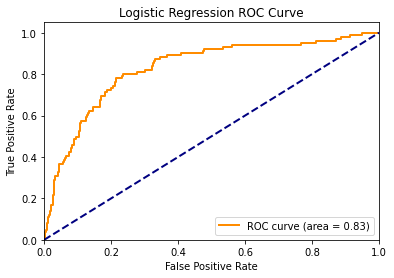

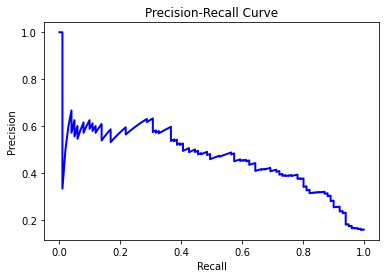

Matthews Correlation Coefficient: 0.2513908769479271
Logistic Regression Cross-validation scores: [0.8576779  0.86679174 0.87242026 0.84615385 0.86116323]
Mean cross-validation accuracy: 0.8608413966594289


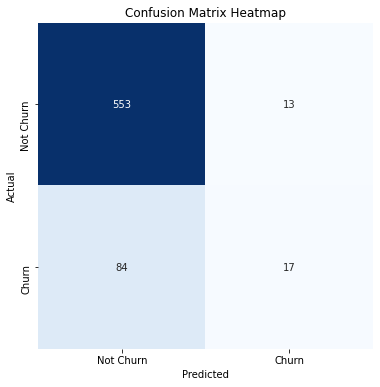

Precision: 0.5666666666666667
Recall: 0.16831683168316833
F1-score: 0.2595419847328244


In [ ]:
# Check data types of the features
print(X.dtypes)

#Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

#Initialize the label encoder
label_encoder = LabelEncoder()

#Encoding categorical features
for col in non_numeric_cols:
    X[col] = label_encoder.fit_transform(X[col])
    
X = df.drop('churn', axis=1) #Features
y = df['churn'] #Target variable

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features (Logistic regression benefits from scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

#Make predictions
y_pred = logreg.predict(X_test_scaled)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#ROC-AUC Curve for Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc}')

#Cross-validation for logistic regression
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

#Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


With an overall accuracy of 85.46%, the Logistic Regression model performs admirably. However, with a poor recall of 0.17 for the "True" class, it misses a substantial chunk of consumers who are likely to churn. The disparity between precision and recall is highlighted by the churn prediction F1-score of 0.26. The model's capacity to differentiate between classes is demonstrated by its ROC-AUC score of 0.83; nevertheless, its overall classification performance is low, as indicated by its Matthews Correlation Coefficient (MCC) of 0.25. With an average accuracy of 86.08% according to cross-validation findings, the model performs well in predicting non-churn clients but has trouble correctly detecting churn cases, either as a result of class imbalance or the need for additional feature engineering.

## 2. RandomForestClassifier

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object
   state  account length  area code  international plan  voice mail plan  \
0     16             128        415                   0                1   
1     35             107        415                   0                1   
2     31             137        415                   0                0   
3     35              84        408 

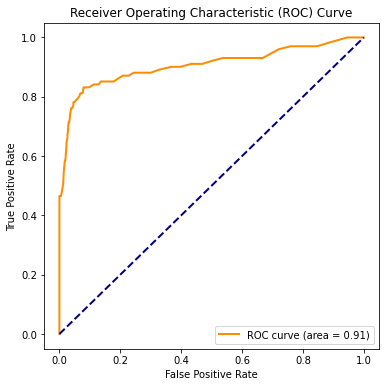

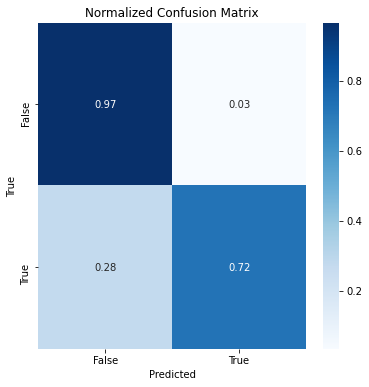

In [ ]:
#Split data into features (X) and target (y)
X = df.drop(['churn', 'phone number'], axis=1)
y = df['churn']

#Inspect the data types
print(X.dtypes)

#Encode categorical features using labelEncoder
categorical_columns = ['state', 'international plan', 'voice mail plan']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

#Check for non-numeric values in the feature set
print(X.head())
print(X.isnull().sum())

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Scale the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

#Train the model
rf_classifier.fit(X_train_resampled, y_train_resampled)

#Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

#Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

#Calculate ROC AUC
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc}")

#Compute F1 Score and Recall
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"F1 Score: {f1}")
print(f"Recall Score: {recall}")

#Feature Importance
feature_importances = rf_classifier.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(f"Feature Importance:\n{feature_importance_df}")

#ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Confusion matrix visualization (normalized)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


With 72% of real churners caught and 28% missed, the Random Forest model's accuracy in forecasting customer attrition was 92.95%. Strong discriminatory strength between churners and non-churners was demonstrated by the 79% accuracy rate of churn forecasts. Customer support calls, total day fee, and total day minutes are important factors in churn prediction. Nevertheless, overfitting risk, computational complexity, and unbalanced data are drawbacks. Model optimization, feature engineering, merging Random Forest with more basic models, and concentrating on retention tactics for clients that use services frequently and heavily are among the suggestions. Results from cross-validation might help us better grasp these constraints. Potentially unbalanced data, computational complexity, and overfitting risk are some of the model's drawbacks.

## 3. XGBoost

state                       int32
account length              int64
area code                   int64
phone number                int32
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
dtype: object
Non-numeric columns: Index([], dtype='object')
Accuracy: 0.95952023988006

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       566
        True       0.95      0.77      0.85       101

    accuracy                           0.96 

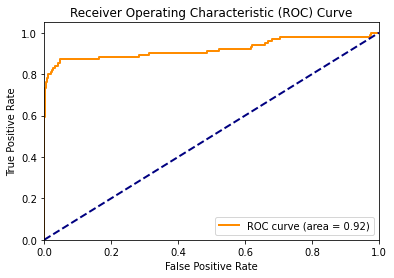

Log-loss: 0.18679431419660722
Precision-Recall AUC: 0.8835671150744704


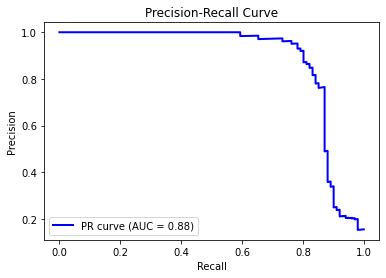

Cross-validation Accuracy Scores: [0.94007491 0.94746717 0.95121951 0.94934334 0.96060038]
Mean Cross-validation Accuracy: 0.9497410600726578


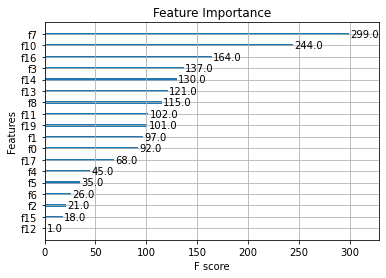

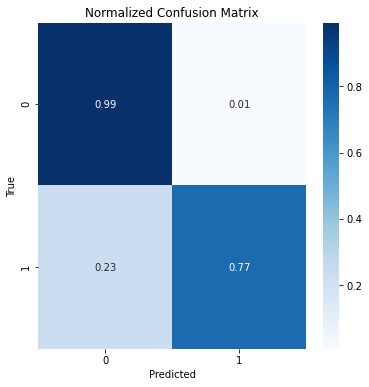

Training Accuracy: 1.0


In [ ]:
#Check data types of the features
print(X.dtypes)

#Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

#Initialize the label encoder
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col])

#Encoding
X = df.drop('churn', axis=1) #Features
y = df['churn'] #Target variable

#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training an XGBoost classifer without the deprecated parameter
xgb_classifier = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

#Fitting the model
xgb_classifier.fit(X_train_scaled, y_train)

#Make predictions
y_pred = xgb_classifier.predict(X_test_scaled)
y_pred_prob = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, zero_division=1))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

#ROC - AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc}')

#Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
      
#Log-loss
logloss = log_loss(y_test, y_pred_prob)
print(f'Log-loss: {logloss}')

#Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc}')

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#Cross-validation score
cv_scores = cross_val_score(xgb_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Cross-validation Accuracy: {cv_scores.mean()}')

#Feature Importance
xgb.plot_importance(xgb_classifier)
plt.title('Feature Importance')
plt.show()

#Confusion Matrix Visualization (Normalized)
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      
plt.figure(figsize=(6, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

#Compare Training vs Testing Accuracy
train_accuracy = accuracy_score(y_train, xgb_classifier.predict(X_train_scaled))
print(f'Training Accuracy: {train_accuracy}')


The XGBoost Classifier has shown strong predictive performance, with an accuracy of 95.95%. It has a strong recall for churners, with 77% of actual churners captured, and 95% of churn predictions correct. The model has a robust capability in distinguishing between churners and non-churners, with a ROC AUC Score of 0.92. Cross-validation accuracy is 94.97%, and training accuracy is 100%. XGBoost identifies features like total day charge, total day minutes, and customer service calls as key contributors to churn predictions. However, it has limitations such as overfitting risk, computational complexity, and less interpretability than simpler models like Logistic Regression. Recommendations include regularization using L1 or L2 regularization and tuning hyperparameters to mitigate overfitting. Focusing on recall improvement for churners is crucial, as false negatives could have significant business implications. Using tools like SHAP can enhance interpretability and better understand feature contributions. Prioritizing retention strategies for customers with high day charges, frequent day usage, and multiple customer service calls is recommended.